In [2]:
# Importing the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras

In [3]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading the dataset into pandas dataframe
df = pd.read_excel('/content/drive/MyDrive/aaaa/Book1.1.1.xlsx')

In [5]:
df1 = df.drop(columns = 'Moisture_level')
df1.head()

,Temperature,Humidity,Pressure
0,28.35,46.59,101.34
1,28.37,46.43,101.33
2,28.37,46.45,101.33
3,28.41,46.43,101.33
4,28.41,46.37,101.33


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Pressure'}>,
        <Axes: title={'center': 'Moisture_level'}>]], dtype=object)

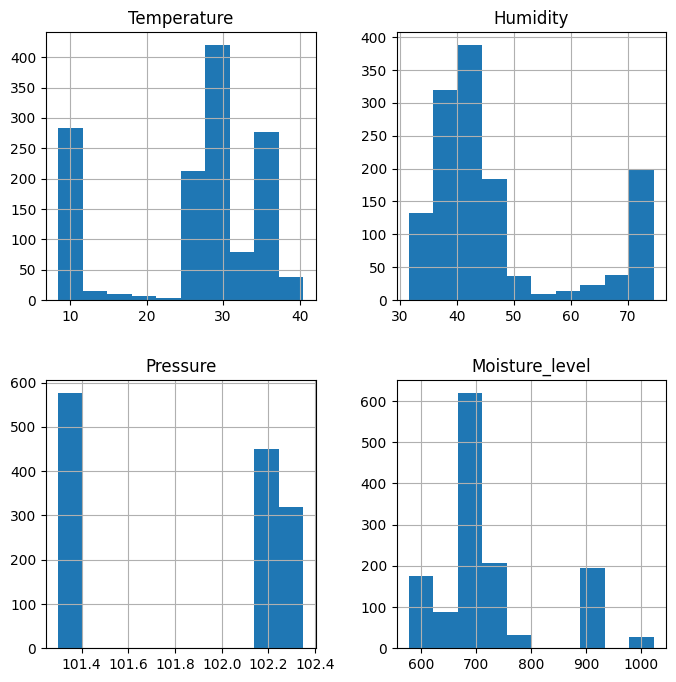

In [6]:
# Histogram of independent variables
df.hist(figsize = (8,8))

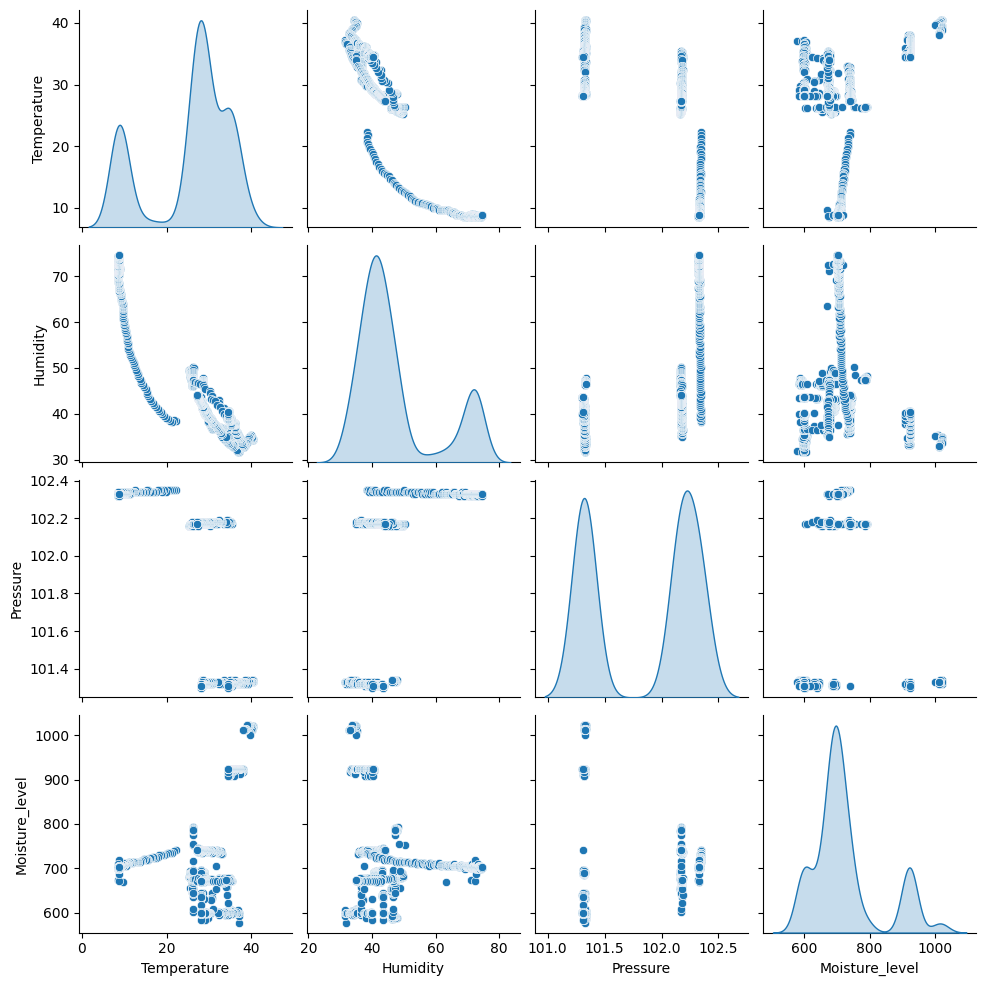

In [46]:
sns.pairplot(df, diag_kind = "kde")

In [7]:
#Assigning the independent features to x and dependent variable to y

y = df[['Moisture_level']]
x = df1

In [9]:
# Splitting the data for training and testing

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape,y_test.shape

((1075, 3), (1075, 1), (269, 3), (269, 1))

In [10]:
# Transforming the data for machine learining

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test =sc.transform(X_test)

1. model 1 with three layers , 64 units for first two layers and last with one unit and no activation for linear activation

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile( loss='mse',optimizer=optimizer,
              metrics = ['mae', 'mse'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Define PrintDot function to print dot for each epoch step
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end = '')


EPOCHS = 1000

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2,
                    verbose = 0, callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

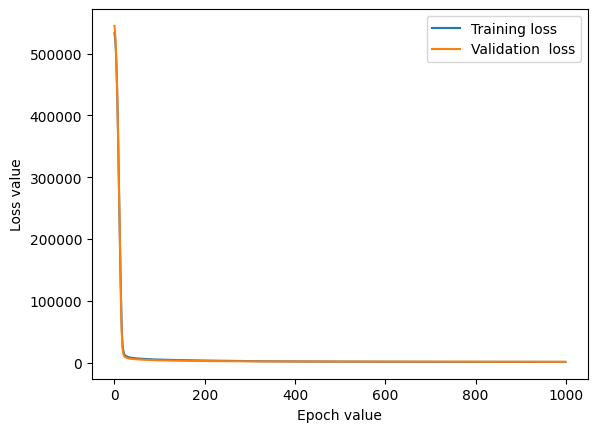

In [13]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation  loss')
plt.ylabel('Loss value')
plt.xlabel('Epoch value')
plt.legend()
plt.show()

In [14]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

9/9 [==============================] - 0s 2ms/step
Mean Absolute Error: 20.242440489588173
Mean Squared Error: 846.7782916646437
Root Mean Squared Error: 29.099455178141113
R-squared: 0.917631020644268


2. model with 128 units in first layer

In [15]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu',
                          input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model1.compile( loss='mse',optimizer=optimizer,metrics = ['mae', 'mse'])


model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               512       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8833 (34.50 KB)
Trainable params: 8833 (34.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
history1 = model1.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose = 0, callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

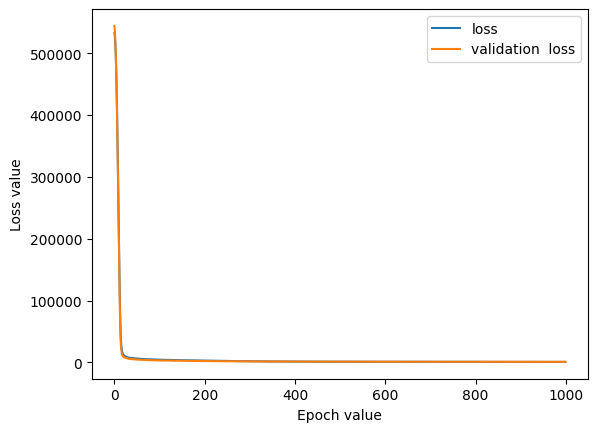

In [17]:
plt.plot(history1.history['loss'], label = 'loss')
plt.plot(history1.history['val_loss'], label = 'validation  loss')
plt.ylabel('Loss value')
plt.xlabel('Epoch value')
plt.legend()
plt.show()

In [18]:
y_pred1 = model1.predict(X_test)
mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
r_squared1 = r2_score(y_test, y_pred1)

print("Mean Absolute Error:", mae1)
print("Mean Squared Error:", mse1)
print("Root Mean Squared Error:", rmse1)
print("R-squared:", r_squared1)

9/9 [==============================] - 0s 2ms/step
Mean Absolute Error: 19.132979722714335
Mean Squared Error: 789.0555386276134
Root Mean Squared Error: 28.09013240672983
R-squared: 0.9232459074452941


3. model with additional layer

In [19]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model2.compile( loss='mse',optimizer=optimizer,metrics = ['mae', 'mse'])


model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8641 (33.75 KB)
Trainable params: 8641 (33.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history2 = model2.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose = 0, callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

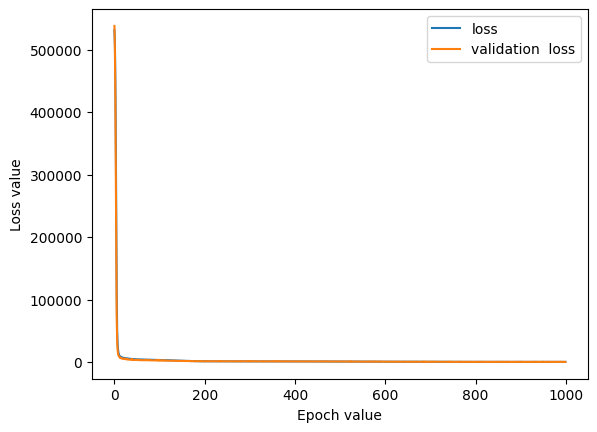

In [21]:
plt.plot(history2.history['loss'], label = 'loss')
plt.plot(history2.history['val_loss'], label = 'validation  loss')
plt.ylabel('Loss value')
plt.xlabel('Epoch value')
plt.legend()
plt.show()

In [22]:
y_pred2 = model2.predict(X_test)
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r_squared2 = r2_score(y_test, y_pred2)

print("Mean Absolute Error:", mae2)
print("Mean Squared Error:", mse2)
print("Root Mean Squared Error:", rmse2)
print("R-squared:", r_squared2)

9/9 [==============================] - 0s 3ms/step
Mean Absolute Error: 13.432977726025209
Mean Squared Error: 417.30385735136593
Root Mean Squared Error: 20.4280164810822
R-squared: 0.9594074468493166


4. model with extra dense layer and 128 units in the first dense layer

In [23]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model3.compile( loss='mse',optimizer=optimizer,metrics = ['mae', 'mse'])


model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               512       
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12993 (50.75 KB)
Trainable params: 12993 (50.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
history3 = model3.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose = 0, callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

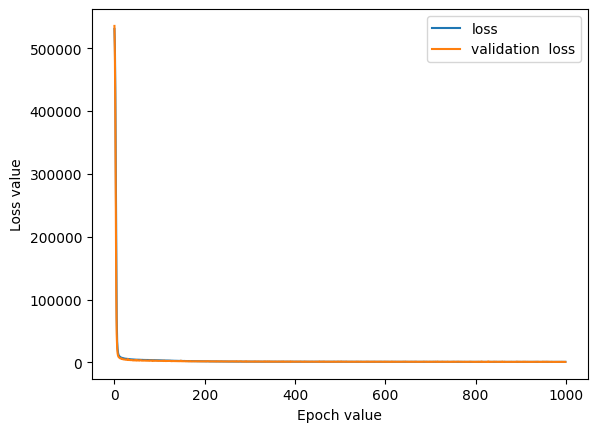

In [25]:
plt.plot(history3.history['loss'], label = 'loss')
plt.plot(history3.history['val_loss'], label = 'validation  loss')
plt.ylabel('Loss value')
plt.xlabel('Epoch value')
plt.legend()
plt.show()

In [26]:
y_pred3 = model3.predict(X_test)
mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r_squared3 = r2_score(y_test, y_pred3)

print("Mean Absolute Error:", mae3)
print("Mean Squared Error:", mse3)
print("Root Mean Squared Error:", rmse3)
print("R-squared:", r_squared3)

9/9 [==============================] - 0s 2ms/step
Mean Absolute Error: 17.373074102578997
Mean Squared Error: 654.6920509823359
Root Mean Squared Error: 25.586950794933262
R-squared: 0.9363158968970325


5. model with extra dense layer and 256 units in the first dense layer

In [27]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model4.compile( loss='mse',optimizer=optimizer,metrics = ['mae', 'mse'])


model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               1024      
                                                                 
 dense_15 (Dense)            (None, 64)                16448     
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 21697 (84.75 KB)
Trainable params: 21697 (84.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
history4 = model4.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose = 0, callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

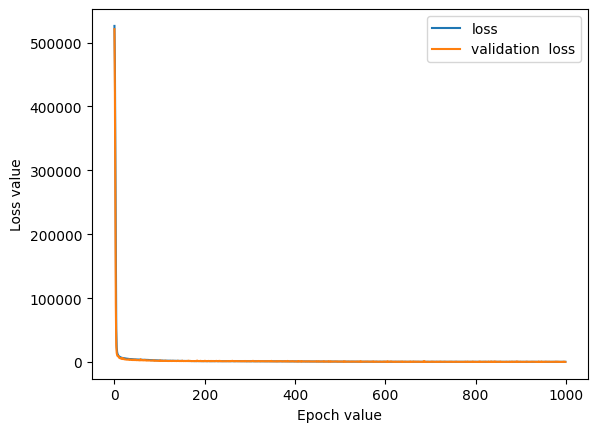

In [29]:
plt.plot(history4.history['loss'], label = 'loss')
plt.plot(history4.history['val_loss'], label = 'validation  loss')
plt.ylabel('Loss value')
plt.xlabel('Epoch value')
plt.legend()
plt.show()

In [30]:
y_pred4 = model4.predict(X_test)
mae4 = mean_absolute_error(y_test, y_pred4)
mse4 = mean_squared_error(y_test, y_pred4)
rmse4 = np.sqrt(mse4)
r_squared4 = r2_score(y_test, y_pred4)

print("Mean Absolute Error:", mae4)
print("Mean Squared Error:", mse4)
print("Root Mean Squared Error:", rmse4)
print("R-squared:", r_squared4)

9/9 [==============================] - 0s 3ms/step
Mean Absolute Error: 11.799217479379648
Mean Squared Error: 331.7683451545172
Root Mean Squared Error: 18.214509193346856
R-squared: 0.9677277745049463


Performance of the model4 on Test data

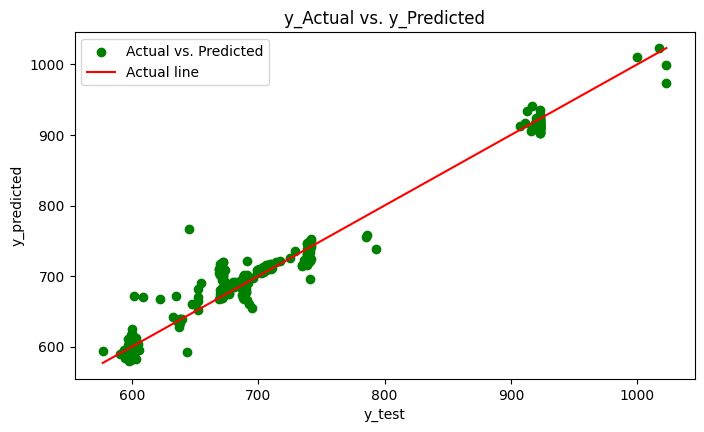

In [31]:
plt.figure(figsize=(8, 4.5))
plt.scatter(y_test, y_pred4, color='green', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Actual line')
plt.title('y_Actual vs. y_Predicted')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
plt.legend()

plt.show()

Performance of the model4 on Train data

34/34 [==============================] - 0s 2ms/step


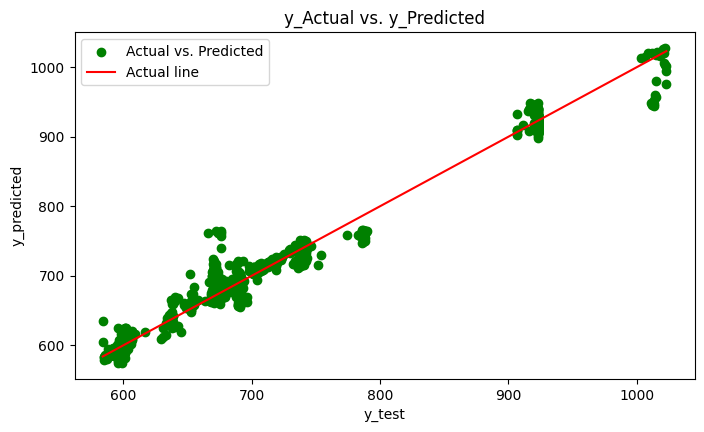

In [32]:
y_pred_train = model4.predict(X_train)
plt.figure(figsize=(8, 4.5))
plt.scatter(y_train, y_pred_train, color='green', label='Actual vs. Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', label='Actual line')
plt.title('y_Actual vs. y_Predicted')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
plt.legend()

plt.show()

Performance of the model4 on Train and Test data

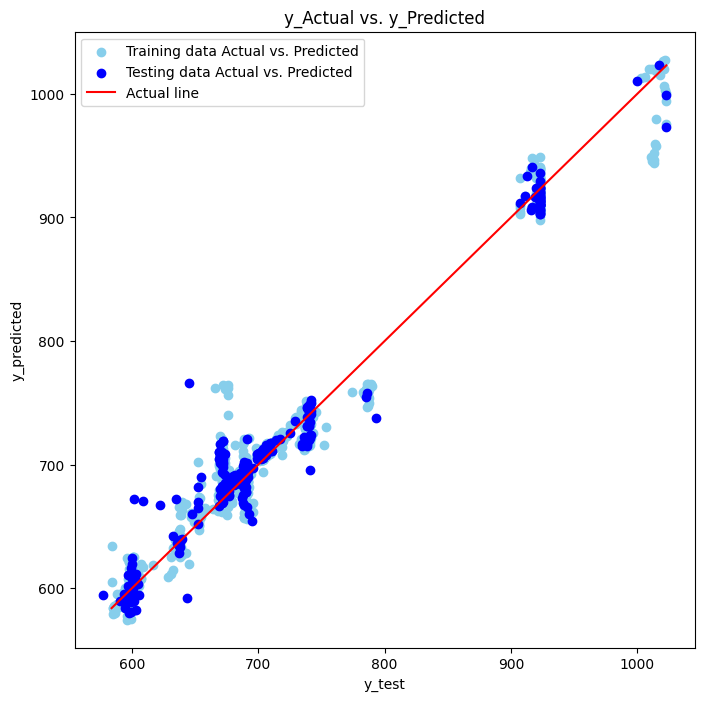

In [33]:
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_pred_train, color='#87CEEB', label='Training data Actual vs. Predicted')
plt.scatter(y_test, y_pred4, color='blue', label='Testing data Actual vs. Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', label='Actual line')
plt.title('y_Actual vs. y_Predicted')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
plt.legend()

plt.show()

6. model with extra dense layer and 512 units in the first dense layer

In [34]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model5.compile( loss='mse',optimizer=optimizer,metrics = ['mae', 'mse'])


model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               2048      
                                                                 
 dense_19 (Dense)            (None, 64)                32832     
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 39105 (152.75 KB)
Trainable params: 39105 (152.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
history5 = model5.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose = 0, callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

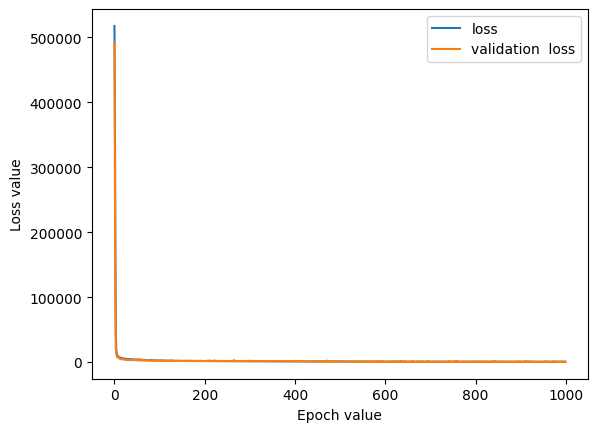

In [36]:
plt.plot(history5.history['loss'], label = 'loss')
plt.plot(history5.history['val_loss'], label = 'validation  loss')
plt.ylabel('Loss value')
plt.xlabel('Epoch value')
plt.legend()
plt.show()

In [37]:
y_pred5 = model5.predict(X_test)
mae5 = mean_absolute_error(y_test, y_pred5)
mse5 = mean_squared_error(y_test, y_pred5)
rmse5 = np.sqrt(mse5)
r_squared5 = r2_score(y_test, y_pred5)

print("Mean Absolute Error:", mae5)
print("Mean Squared Error:", mse5)
print("Root Mean Squared Error:", rmse5)
print("R-squared:", r_squared5)

9/9 [==============================] - 0s 4ms/step
Mean Absolute Error: 14.072088418840032
Mean Squared Error: 382.2789462480597
Root Mean Squared Error: 19.551955049254275
R-squared: 0.9628144380393401


In [42]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model4)
tflite_model = converter.convert()

# Save the model as a .tflite file
with open('model4.tflite', 'wb') as f:
    f.write(tflite_model)

In [45]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat model4.tflite.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 979,228 bytes.
